In [1]:
import pandas_datareader as pdr
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
def get_input_feature(ticker, start_date, end_date):
    
    return pdr.get_data_yahoo(ticker,start_date, end_date)

In [3]:
###################################
# make input features
###################################
# read IVV stock data
import datetime

now = datetime.datetime.now()
end_date = now.strftime("%Y-%m-%d")
print end_date
                        
ivv = get_input_feature('IVV','2016-01-01', end_date)
gld = get_input_feature('GLD','2016-01-01', end_date)

prices = ivv['Adj Close']
features = ivv.drop(['Open', 'High', 'Close', 'Low'], axis = 1)

# Rolling Mean 20 days
rm20_ivv = pd.rolling_mean(ivv['Adj Close'], window=20)
rm20_ivv_ = pd.DataFrame(rm20_ivv)
rm20_ivv_ = rm20_ivv_.rename(columns = {'Adj Close':'RM20'})
#print "rm20_ivv_.dtypes", rm20_ivv_.dtypes
#print rm20_ivv_.tail()

# Rolling Mean 40 days
rm40_ivv = pd.rolling_mean(ivv['Adj Close'], window=40)
rm40_ivv_ = pd.DataFrame(rm40_ivv)
rm40_ivv_ = rm40_ivv_.rename(columns = {'Adj Close':'RM40'})

#print gld.head()
gold = gld.drop(['Open', 'High', 'Close', 'Low', 'Volume'], axis = 1)
gold = gold.rename(columns = {'Adj Close':'GLD'})
#print gold.head()
#print "gold.dtypes", gold.dtypes

features = features.join(gold, how='inner')
features = features.join(rm20_ivv_, how='inner')
features = features.join(rm40_ivv_, how='inner')

print features.head()


2017-12-12
             Adj Close   Volume         GLD  RM20  RM40
Date                                                   
2016-01-04  195.053482  7440000  102.889999   NaN   NaN
2016-01-05  195.459030  5262200  103.180000   NaN   NaN
2016-01-06  192.900162  5496600  104.669998   NaN   NaN
2016-01-07  188.284531  7545000  106.150002   NaN   NaN
2016-01-08  186.198837  8904100  105.680000   NaN   NaN


/home/chrisle/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:18: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
/home/chrisle/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:25: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=40,center=False).mean()


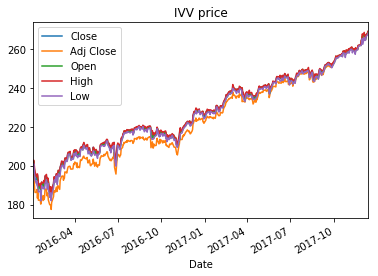

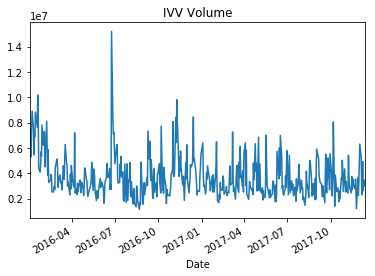

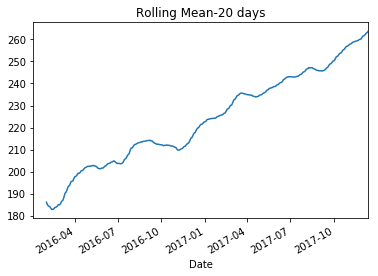

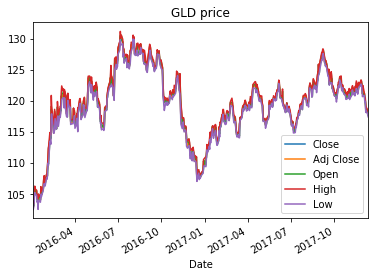

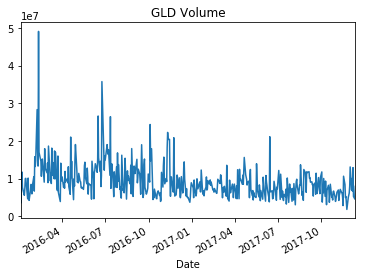

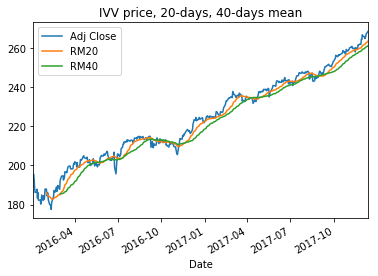

In [4]:
##################################
# check input features using graph
#################################
# plot IVV stock 
import pandas as pd 
import matplotlib.pyplot as plt

ivv[['Close','Adj Close', 'Open', 'High', 'Low']].plot(title='IVV price')
plt.show()

ivv['Volume'].plot(title='IVV Volume')
plt.show()

rm20_ivv.plot(title='Rolling Mean-20 days')
plt.show()


gld[['Close','Adj Close', 'Open', 'High', 'Low']].plot(title='GLD price')
plt.show()

gld['Volume'].plot(title='GLD Volume')
plt.show()


features[['Adj Close', 'RM20', 'RM40']].plot(title='IVV price, 20-days, 40-days mean')
plt.show()


In [5]:
# do linear regression for benchmark

from pandas import Series, DataFrame, Panel
from sklearn.model_selection import train_test_split
X_train = features[45:-10]
y_train = prices[50:-5]
X_test = features[-55:-5]
y_test = prices[-50:]
X_future = features[-5:]

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

print X_train.head()
#print X_train[:,1]
print y_train.head()


from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

y_future = regr.predict(X_future)

Training set has 436 samples.
Testing set has 50 samples.
             Adj Close   Volume         GLD        RM20        RM40
Date                                                               
2016-03-09  193.518158  3239400  119.580002  188.363717  186.052287
2016-03-10  193.624374  3302300  121.500000  189.057510  186.197128
2016-03-11  196.830200  2675500  119.410004  190.023604  186.536300
2016-03-14  196.559830  4579800  117.870003  190.796575  186.796049
2016-03-15  196.231537  4213300  117.959999  191.402496  187.145600
Date
2016-03-16    197.486801
2016-03-17    198.732437
2016-03-18    199.466339
2016-03-21    199.755997
2016-03-22    199.640121
Name: Adj Close, dtype: float64
('Coefficients: \n', array([  8.90807034e-01,   3.23795235e-07,   9.95224938e-04,
         6.79604499e-02,   4.63225495e-02]))
Mean squared error: 3.17
Variance score: 0.76


             Adj Close  Prediction
Date                              
2017-10-03  254.570007  251.730092
2017-10-04  254.899994  252.678824
2017-10-05  256.380005  252.595198
2017-10-06  256.109985  254.371650
2017-10-09  255.679993  254.834013
2017-10-10  256.339996  254.809375
2017-10-11  256.709991  255.341222
2017-10-12  256.339996  257.096511
2017-10-13  256.630005  258.194763
2017-10-16  257.049988  255.689967
2017-10-17  257.209991  257.105213
2017-10-18  257.429993  257.380340
2017-10-19  257.529999  256.896402
2017-10-20  258.850006  257.041007
2017-10-23  257.859985  257.540402
2017-10-24  258.250000  257.518560
2017-10-25  257.040009  257.589513
2017-10-26  257.350006  257.989234
2017-10-27  259.410004  259.015238
2017-10-30  258.519989  258.705231
2017-10-31  258.809998  259.044416
2017-11-01  259.230011  258.500529
2017-11-02  259.369995  258.541288
2017-11-03  260.179993  259.876321
2017-11-06  260.619995  259.687923
2017-11-07  260.489990  259.653732
2017-11-08  260.9400

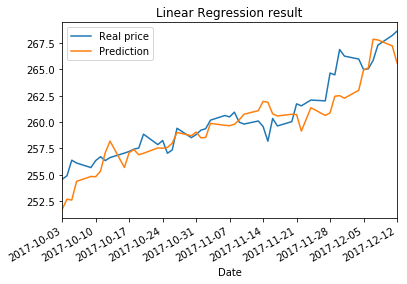

[ 265.49785897  267.08637396  267.67163054  268.80334422  269.07298248]


In [6]:
# plot linear regression result

LR_result = pd.DataFrame(y_test)
#print LR_result 
#print y_pred
#print y_test

LR_result = LR_result.assign(Prediction = y_pred)
print LR_result
LR_result = LR_result.rename(columns = {'Adj Close':'Real price'})
LR_result[['Real price','Prediction']].plot(title='Linear Regression result')
plt.show()

print y_future

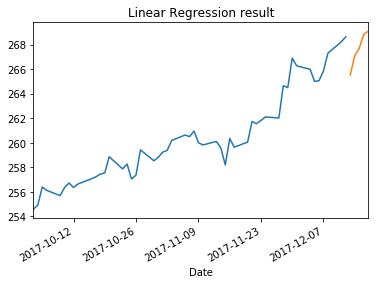

In [34]:
# Predict future 1-week IVV stock prices
X_train = features[45:-5]
y_train = prices[50:]
X_future = features[-5:]

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_future = regr.predict(X_future)

start_predict_day = now+datetime.timedelta(1)
end_predict_day = now+datetime.timedelta(5)
start_predict_day = start_predict_day.strftime("%Y-%m-%d")
end_predict_day = end_predict_day.strftime("%Y-%m-%d")

days = pd.date_range(start_predict_day, end_predict_day, freq='D')
real_prices = prices[-50:]
ax = real_prices.plot()
df['Prediction'].plot(title='Linear Regression result', ax = ax)
plt.show()